# Übungsblatt 3



## Aufgabe 4

In [54]:
import numpy as np
import matplotlib.pyplot as plt 
import math 
from objdict import ObjDict

### Aufgabe 4.1

In [55]:
s = ObjDict()
s.E = 35e9  
s.d = 0.8  
s.l = 20  
s.F = 2e6  
s.phi = 2500  
s.g = 9.81  
s.C = 1.75e7  
s.S = 120e6
s.EA = s.E*(s.d/2)**2*np.pi
s.n = (s.d/2)**2*np.pi*s.l*s.phi

### Aufgabe 4.2

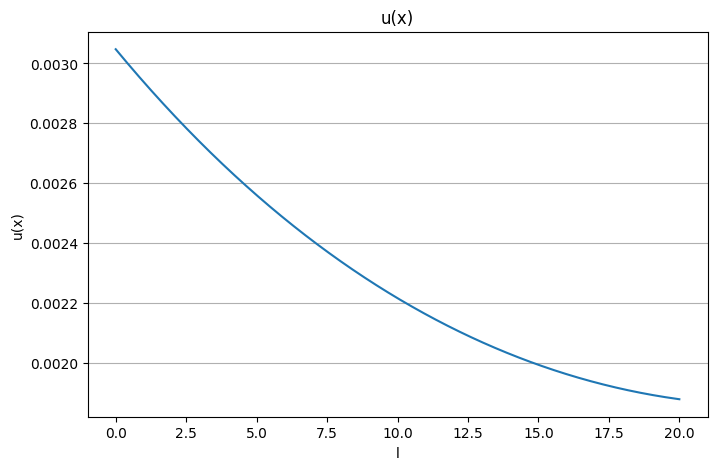

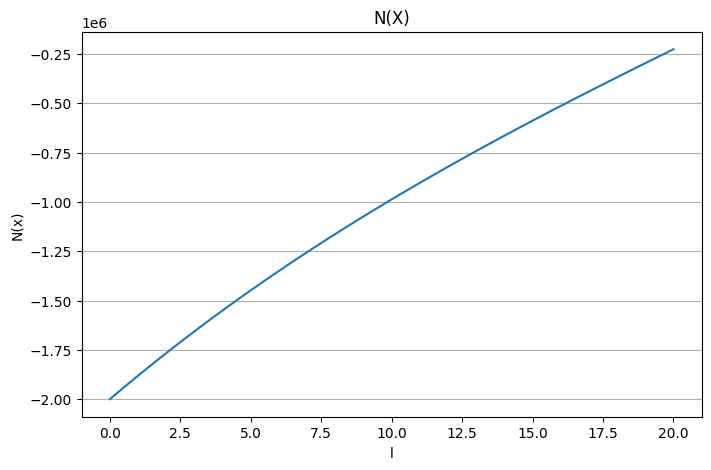

In [56]:
a1 = 3+7*np.pi
a2 = 7*np.pi-3

def u(x, a1, a2):
    u = (
        (math.exp(-x / 20) / (3500000 * np.pi * (a1 * math.exp(2) - a2))) *
        ((25000 * (a1 * math.exp(2) + a2 * math.exp(x / 10))) -
         2943 * np.pi * math.exp(1) * (math.exp(x / 10) + 1) +
         981 * np.pi * math.exp(x / 20) * (a1 * math.exp(2) - a2)))
    return u

def N(x, a1, a2):
    N = (
    -(80*math.exp(-x/20)/(a1*math.exp(2)-a2))*
    (25000*(a1*math.exp(2)-a2*math.exp(x/10))
     +2943*np.pi*math.exp(1)*(math.exp(x/10)-1))
    )
    return N 

xR = np.linspace(0, s.l, 1000)
uR = []
NR = []

for x in xR:
    u_value = u(x, a1, a2)
    N_value = N(x, a1, a2)
    uR.append(u_value)
    NR.append(N_value)

uR = np.array(uR)
NR = np.array(NR)

plt.figure(figsize=(8, 5))
plt.plot(xR,uR)
plt.xlabel('l')
plt.ylabel('u(x)')
plt.title('u(x)')  
plt.grid(axis='y')
#plt.show()

plt.figure(figsize=(8, 5))
plt.plot(xR,NR)
plt.xlabel('l')
plt.ylabel('N(x)')
plt.title('N(X)')  
plt.grid(axis='y')
#plt.show()


### Aufgabe 4.3

K_ij = K_EA_ij + K_c_ij + K_s_ij

K_EA_ij = EA+(int0-l(phii'*phij'))


In [75]:
from functions import pileFEM

def pileFEM(s,k):
    
    N = k + 1
    h = s.l/k
    
    def tridiag(a,b,c):
        return \
            np.diag([a]+(N-2)*[b]+[a])+ \
            np.diag((N-1)*[c],k=1)+ \
            np.diag((N-1)*[c],k=-1)

    K_EA = s.EA / h * tridiag(1,2,-1)
    K_C = h * s.C / tridiag(2,4,1)

    K_S = np.zeros([N,N])
    K_S[-1,-1] = s.S

    K = K_EA + K_C + K_S

    r = s.n * h / 2 * np.array ([1] + (N-2) * [2] + [1])
    r[0]= s.F

    uHatK = np.linalg.solve(K,r)
    xK = np.linspace (0, s.l, k+1)
    return [xK, uHatK]

xK, uHatK = pileFEM(s,k)

print (xK)
print (uHatK)




[ 0. 10. 20.]
[0.00000000e+00 7.05513375e-05 0.00000000e+00]


/var/folders/77/lxv4dv857_sg_4p1ywv8lqmh0000gn/T/ipykernel_41168/1426850507.py:15: RuntimeWarning: divide by zero encountered in divide
  K_C = h * s.C / tridiag(2,4,1)


### Aufgabe 4.4

Näherungslösung für k = 2,4,8,...,256 Elemente

2


/var/folders/77/lxv4dv857_sg_4p1ywv8lqmh0000gn/T/ipykernel_41168/1426850507.py:15: RuntimeWarning: divide by zero encountered in divide
  K_C = h * s.C / tridiag(2,4,1)


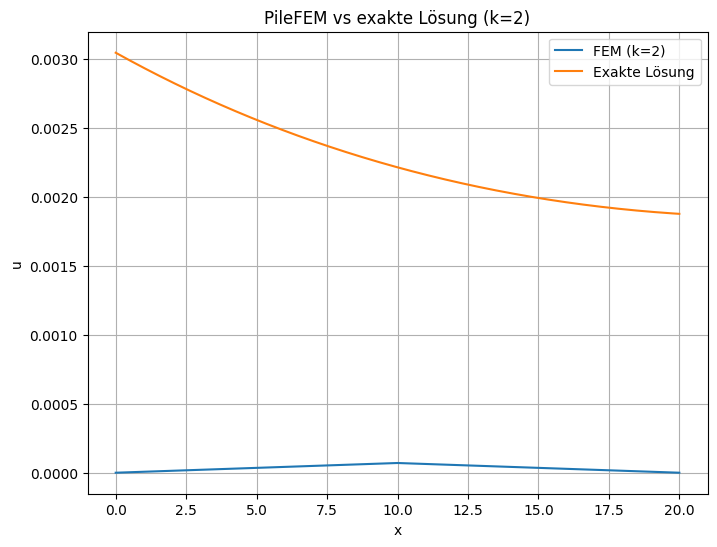

4


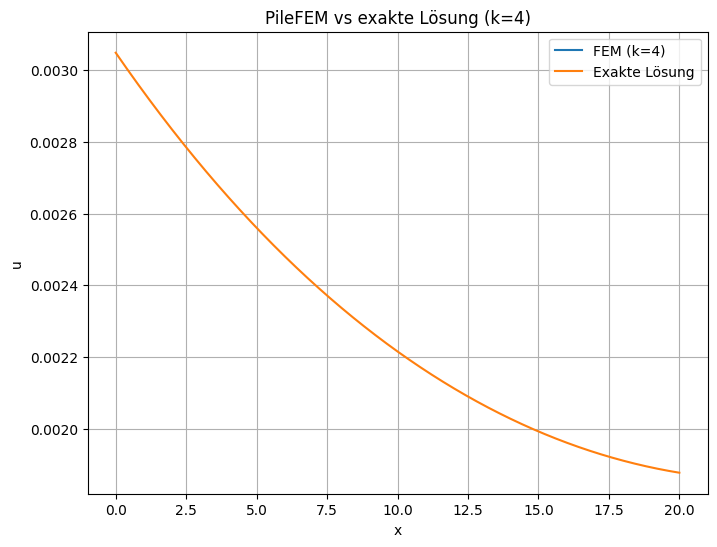

8


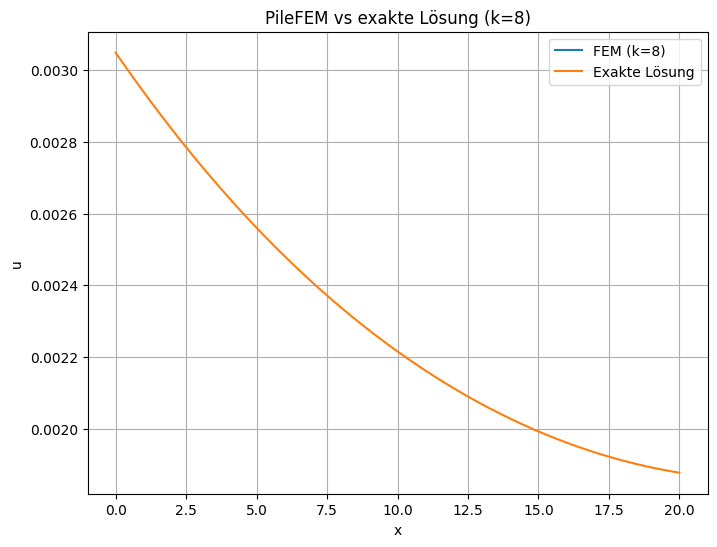

16


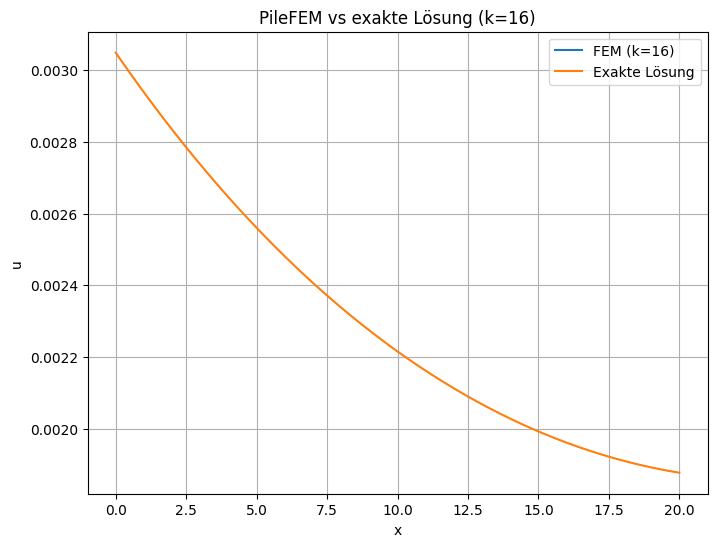

32


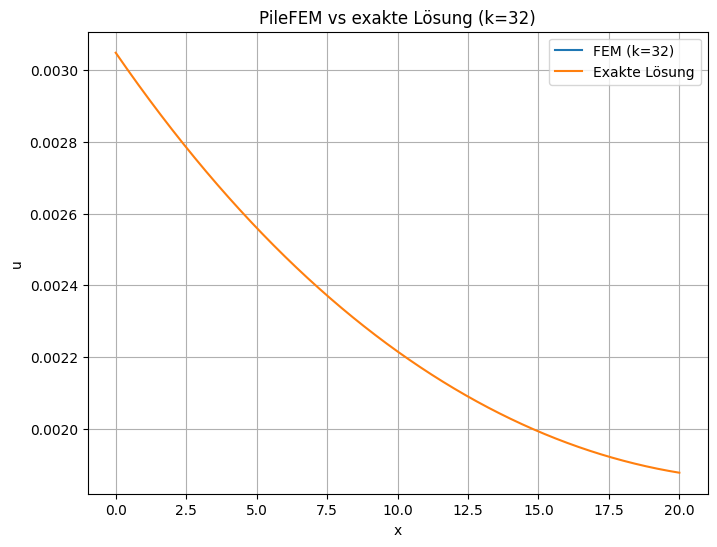

64


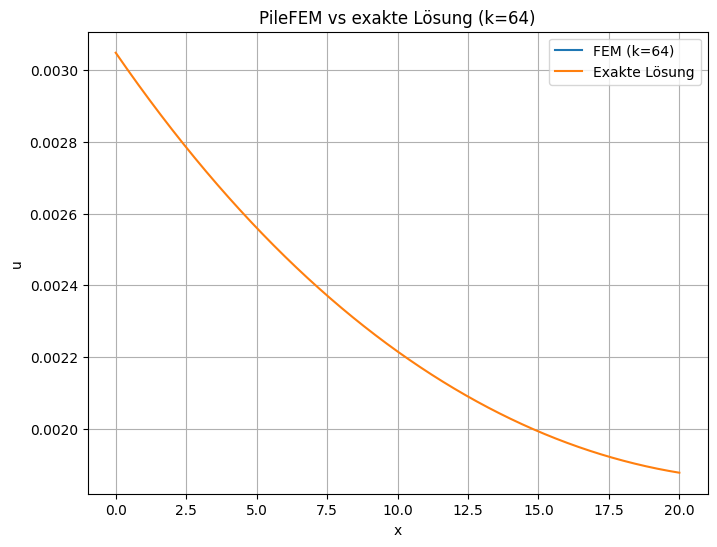

128


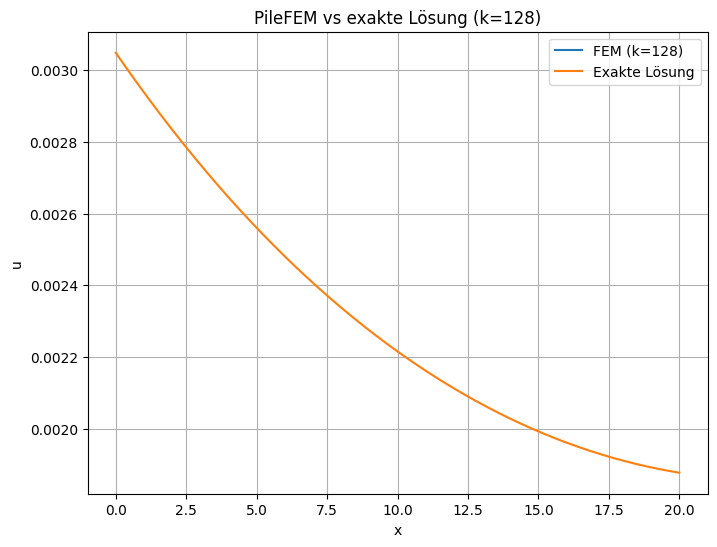

256


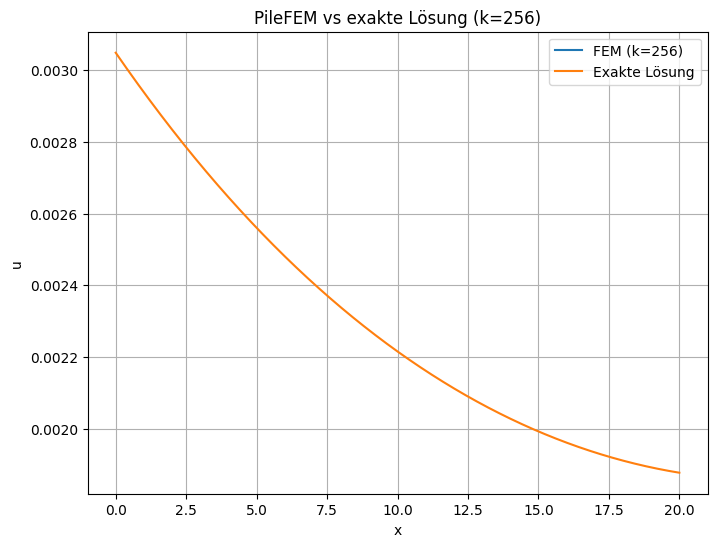

512


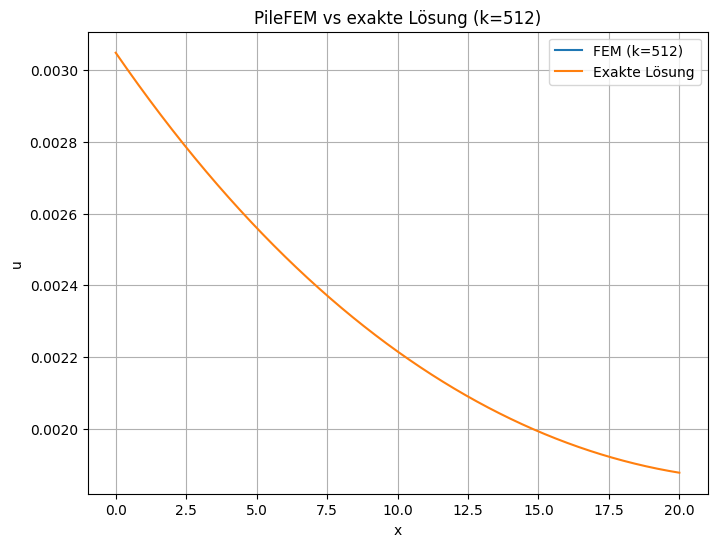

In [77]:
k = 2 ** np.array(range(1, 10))  

for i in k:
    xK, uHatK = pileFEM(s, i)
    print (i)
    plt.figure(figsize=(8, 6))
    plt.plot(xK, uHatK, label=f"FEM (k={i})")
    plt.plot(xR, uR, label="Exakte Lösung")
    plt.xlabel("x")
    plt.ylabel("u")
    plt.title(f"PileFEM vs exakte Lösung (k={i})")
    plt.legend()
    plt.grid(True)
    plt.show()

